# Playing with different classification algorithms

In [2]:
import numpy as np

%matplotlib inline

In [3]:
from sklearn.datasets import load_iris

iris = load_iris()

x, y = iris.data, iris.target

In [38]:
input = [[5, 4, 3, 2]]

### Linear Support Vector Cluster

In [35]:
from sklearn.svm import LinearSVC

clf = LinearSVC().fit(x,y)
clf.predict(input)

array([0, 2, 0])

### Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression

clf2 = LogisticRegression().fit(x,y)
clf2.predict(input)

array([0, 2, 0])

### Stocastic Gradient Descent

In [30]:
from sklearn.linear_model import SGDClassifier

clf3 = SGDClassifier().fit(x,y)
clf3.predict(input)

array([0, 2, 0])

### K-Nearest Neighbors

In [31]:
from sklearn.neighbors import KNeighborsClassifier

clf4 = KNeighborsClassifier(n_neighbors=5).fit(x,y)
clf4.predict(input)

array([0, 1, 1])

### Gaussian Naive Bayes

In [27]:
from sklearn.naive_bayes import GaussianNB

clf5 = GaussianNB().fit(x,y)
clf5.predict(input)

array([0, 2, 1])

## Checking Basic Accuracy of the models used

In [72]:
from sklearn import metrics
algorithms = ["Linear SVC", "LR", "SGD", "KNN (n=5)", "Gaussian NB"]
accuracies = [metrics.accuracy_score(ytest, clf.predict(xtest)) * 100, 
              metrics.accuracy_score(ytest, clf2.predict(xtest))* 100, 
              metrics.accuracy_score(ytest, clf3.predict(xtest))* 100, 
              metrics.accuracy_score(ytest, clf4.predict(xtest))* 100, 
              metrics.accuracy_score(ytest, clf5.predict(xtest))* 100]

for algo, score in zip(algorithms, accuracies):
    print("{}: {} %".format(algo, score))

Linear SVC: 93.33333333333333 %
LR: 95.0 %
SGD: 71.66666666666667 %
KNN (n=5): 96.66666666666667 %
Gaussian NB: 96.66666666666667 %


## Testing with Train/Test split

In [41]:
from sklearn.cross_validation import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.4, random_state=4)

/Users/kiran/Envs/dswithpandas/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [70]:
clf = LinearSVC().fit(xtrain, ytrain)
clf2 = LogisticRegression().fit(xtrain, ytrain)
clf3 = SGDClassifier().fit(xtrain, ytrain)
clf4 = KNeighborsClassifier(n_neighbors=5).fit(xtrain, ytrain)
clf5 = GaussianNB().fit(xtrain, ytrain)

In [73]:
from sklearn import metrics
algorithms = ["Linear SVC", "LR", "SGD", "KNN (n=5)", "Gaussian NB"]
accuracies = [metrics.accuracy_score(ytest, clf.predict(xtest)) * 100, 
              metrics.accuracy_score(ytest, clf2.predict(xtest))* 100, 
              metrics.accuracy_score(ytest, clf3.predict(xtest))* 100, 
              metrics.accuracy_score(ytest, clf4.predict(xtest))* 100, 
              metrics.accuracy_score(ytest, clf5.predict(xtest))* 100]

for algo, score in zip(algorithms, accuracies):
    print("{}: {} %".format(algo, score))

Linear SVC: 93.33333333333333 %
LR: 95.0 %
SGD: 71.66666666666667 %
KNN (n=5): 96.66666666666667 %
Gaussian NB: 96.66666666666667 %


<Container object of 5 artists>

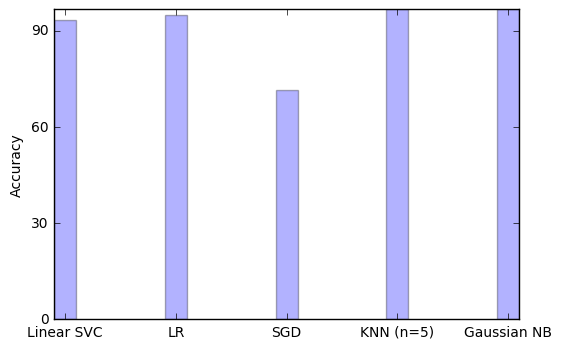

In [74]:
import matplotlib.pyplot as plt

xaxis = np.arange(len(algorithms))

plt.ylabel("Accuracy")
plt.xticks(xaxis, algorithms)
plt.yticks(np.arange(0, 121, 30))
plt.bar(yaxis, accuracies, align='center', alpha=0.3, width=0.2)

## K-fold Cross Validation Score

Let's run a 10 fold cross-validation:

In [76]:
from sklearn.cross_validation import cross_val_score

In [110]:
import matplotlib.pyplot as plt

def plot_score(values, scores):
    plt.xlabel("No of folds")
    plt.ylabel("Cross-Validated Accuracy")
    plt.grid()
    plt.plot(values, scores)
    
    
def get_data(estimator, folds=10):
    kvalues = range(1, 20)
    accuracies = []

    for k in kvalues:
        scores = cross_val_score(estimator, x, y, cv=folds, scoring='accuracy')
        accuracies.append(scores.mean())
        
    return (kvalues, accuracies)

### Linear SVC

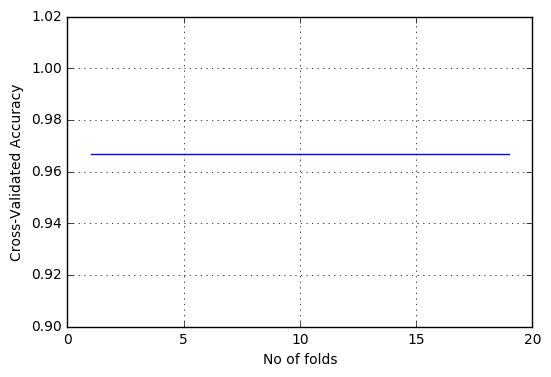

In [111]:
plot_score(*get_data(clf))

### LR

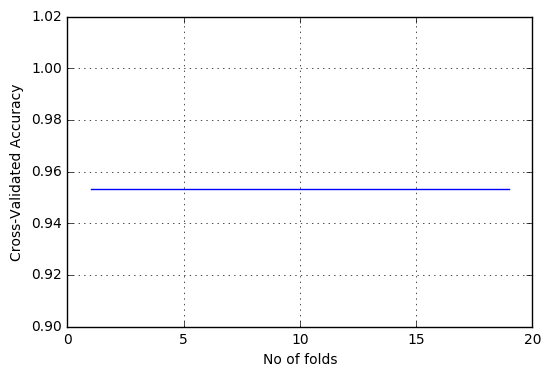

In [95]:
plot_score(*get_data(clf2))

### SGD

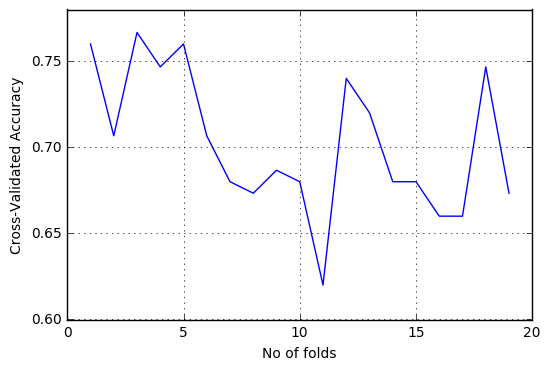

In [96]:
plot_score(*get_data(clf3))

### KNN (N=5)

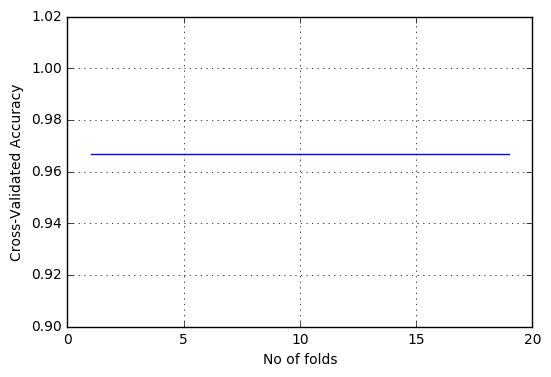

In [97]:
plot_score(*get_data(clf4))

### Gaussian NB

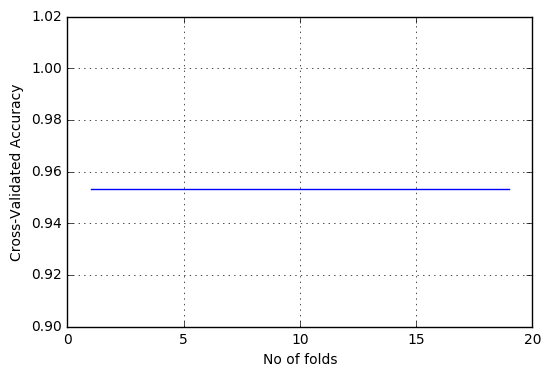

In [98]:
plot_score(*get_data(clf5))